## EDA

### Import stuff and clean data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
fifa_19 = pd.read_csv('players_19.csv')
fifa_19.shape

(18085, 106)

In [3]:
fifa_19_columns = fifa_19.columns.tolist()
print_columns = False
if print_columns:
    for i,col in enumerate(fifa_19_columns):
        print(i,col)

In [4]:
# Remove the columns that are not needed
fifa_19.drop(fifa_19_columns[27:45], axis=1, inplace=True)
fifa_19.drop(fifa_19_columns[80:], axis=1, inplace=True)
fifa_19.drop(["sofifa_id","player_url","long_name","dob","league_rank","real_face","release_clause_eur"], axis=1, inplace=True)

In [5]:
# Remove some rows that are not needed
fifa_19.dropna(subset=['player_positions','club_name','league_name'],inplace=True)
fifa_19.shape

(17851, 55)

In [6]:
print_na_columns = False
fifa_19_columns = fifa_19.columns.tolist()
if print_na_columns:
    for i in fifa_19_columns:
        print(i,fifa_19[i].isna().sum())
        
fifa_19.head(3)

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,player_tags,team_position,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,Cristiano Ronaldo,33,187,83,Portugal,Juventus,Italian Serie A,94,94,77000000,400000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",ST,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11
1,L. Messi,31,170,72,Argentina,FC Barcelona,Spain Primera Division,94,94,110500000,575000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
2,Neymar,26,175,68,Brazil,Paris Saint-Germain,French Ligue 1,92,93,118500000,300000,LW,Right,5,5,5,High/Medium,Neymar,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",LW,"Diver, Selfish, Flair, Speed Dribbler (AI), Te...",79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11


### Relationship between Positions

In [7]:
fifa_19['player_positions'] = fifa_19['player_positions'].str.split(', ')
fifa_19['player_tags'] = fifa_19['player_tags'].str.split(', ')

In [8]:
from collections import Counter

# All positions
all_positions = set()
for i in fifa_19['player_positions']:
    all_positions.update(i)
all_positions = list(all_positions)
all_positions.sort()

# Write a more readable version of the code below

# All possible pairs of positions
all_positions_pairs = []
for i in range(len(all_positions)):
    for j in range(len(all_positions)):
        all_positions_pairs.append((all_positions[i],all_positions[j]))

positions_pairs_count = Counter(all_positions_pairs)
# Subtract 1 from every element in the count
for i in positions_pairs_count:
    positions_pairs_count[i] -= 1

player_positions_array = [ set(i) for i in fifa_19['player_positions']]

for j in positions_pairs_count:
    for i,positions in enumerate(player_positions_array):
        # If j is a subset of positions then add 1 to the count
        if j[0] in positions and j[1] in positions:
            positions_pairs_count[j] += 1

# Covert positions_pairs_count into adjacency matrix
positions_pairs_count_matrix = np.zeros((len(all_positions),len(all_positions)),dtype=int)
for i in positions_pairs_count:
    positions_pairs_count_matrix[all_positions.index(i[0]),all_positions.index(i[1])] = positions_pairs_count[i]

# Convert it into a dataframe
positions_pairs_count_df = pd.DataFrame(positions_pairs_count_matrix, index=all_positions, columns=all_positions)
# Order from Goalkeeper to Striker
ordered_all_players = ['GK','CB','LB','RB','LWB','RWB','CDM','CM','LM','RM','CAM','CF','LW','RW','ST']
# Adjust the order of the columns and rows
positions_pairs_count_df = positions_pairs_count_df.reindex(index=ordered_all_players, columns=ordered_all_players)

positions_pairs_count_df.to_csv('Position_Pairs.csv')
positions_pairs_count_df

,GK,CB,LB,RB,LWB,RWB,CDM,CM,LM,RM,CAM,CF,LW,RW,ST
GK,1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CB,0,3660,460,569,30,26,519,185,25,13,4,0,1,0,6
LB,0,460,2015,389,204,18,93,88,422,62,16,1,37,11,6
RB,0,569,389,2005,11,170,166,132,55,337,19,0,9,29,6
LWB,0,30,204,11,266,14,4,8,91,12,6,1,9,2,3
RWB,0,26,18,170,14,237,7,17,11,72,5,1,0,10,6
CDM,0,519,93,166,4,7,2670,1823,77,95,276,3,4,2,5
CM,0,185,88,132,8,17,1823,3749,382,371,867,31,67,77,49
LM,0,25,422,55,91,11,77,382,2536,1065,613,66,258,107,492
RM,0,13,62,337,12,72,95,371,1065,2460,536,67,88,253,487


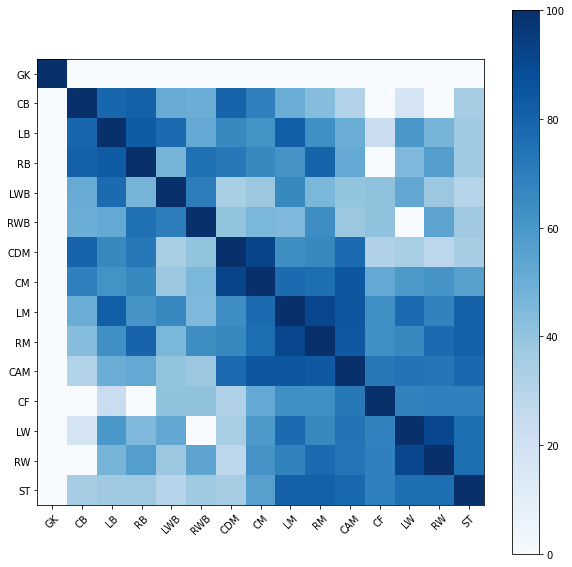

In [9]:
# Convert DataFrame to float
adjusted_pairs = positions_pairs_count_df.astype(float)
# Find the sum of each row and each column
# Then divide each element by the product of the max of the row and column
row_sums = adjusted_pairs.max(axis=1)
col_sums = adjusted_pairs.max(axis=0)
for i in adjusted_pairs:
    for j in adjusted_pairs:
        max_of_maximums = max(row_sums[i],col_sums[j])
        adjusted_pairs[i][j] = adjusted_pairs[i][j] / max_of_maximums

# f(x) = log(x) except when x = 0 then f(x) = 0
# Apply this function to the dataframe efficiently
adjusted_pairs = adjusted_pairs.applymap(lambda x: 100+(np.log(x)*10) if x != 0 else 0)     
adjusted_pairs = adjusted_pairs.astype(int)

# Colored graph
# Darker blue show the higher the value
# Lighter blue show the lower the value

plt.figure(figsize=(10,10))
plt.imshow(adjusted_pairs, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(adjusted_pairs)), ordered_all_players, rotation=45)
plt.yticks(np.arange(len(adjusted_pairs)), ordered_all_players)
plt.show()

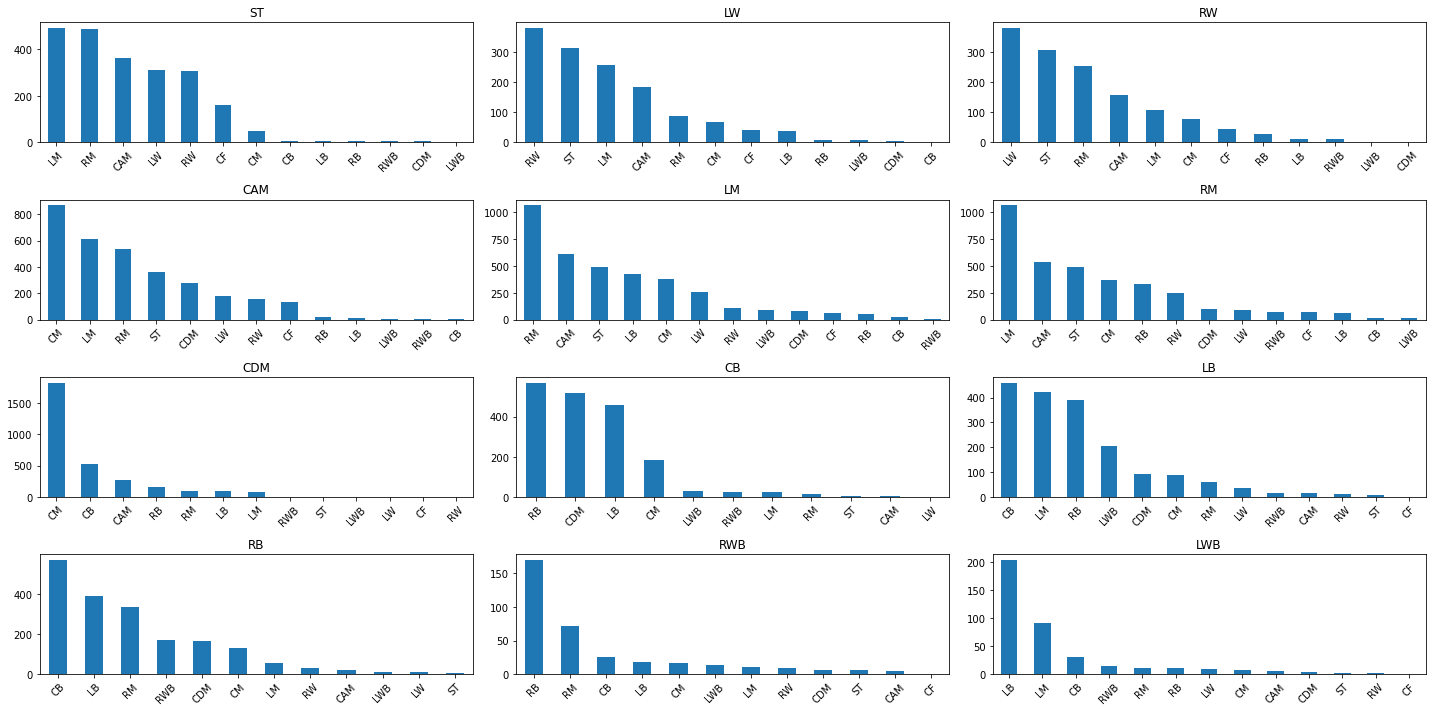

In [10]:
# Draw a seperate bar chart for each row. There should three bars for each row 
interesting_positions = ['ST', 'LW', 'RW', 'CAM', 'LM', 'RM', 'CDM', 'CB', 'LB', "RB", 'RWB','LWB']

for i in range(len(interesting_positions)):
    interesting_row = positions_pairs_count_df.loc[interesting_positions[i]]
    # Sort the row in descending order
    interesting_row = interesting_row.sort_values(ascending=False)
    # Drop the zero values
    interesting_row = interesting_row[interesting_row > 0]
    # Drop the first column
    interesting_row = interesting_row.drop(interesting_positions[i])

    plt.subplot(4,3,i+1)
    interesting_row.plot.bar()
    plt.title(interesting_positions[i])
    plt.xticks(rotation=45)

    ## Increase figure size to make it easier to read
    plt.gcf().set_size_inches(20,10)
    plt.tight_layout()

### At what age is a player at his prime?

Text(0.5, 0, 'Age')

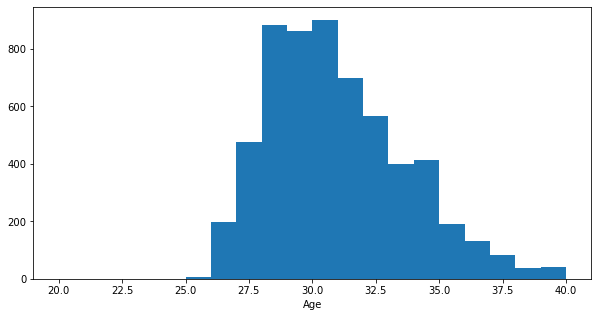

In [11]:
# Method 1: Age when Overall = Potential
overall_equals_potential = fifa_19.loc[:, 'overall'] == fifa_19.loc[:, 'potential']
ages_when_OEP = fifa_19.loc[overall_equals_potential, 'age']
plt.figure(figsize=(10,5))
plt.hist(ages_when_OEP, bins=range(20,41,1) )
plt.xlabel('Age')
# prime: 28-32 years old



Text(0, 0.5, 'Count of Players')

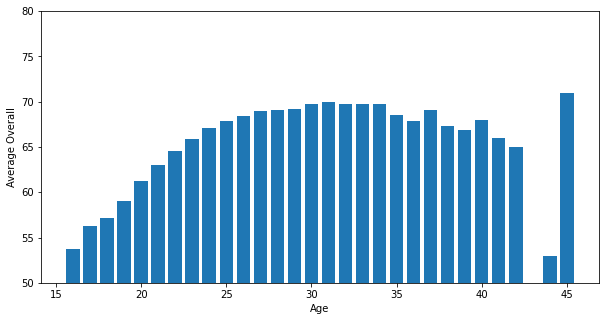

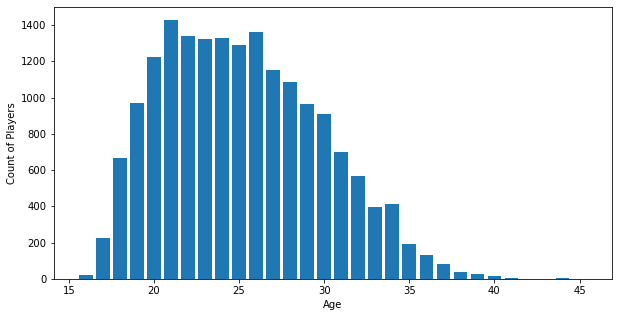

In [12]:
# Method 2: Mean overall at each age
mean_overall_at_each_age = fifa_19.groupby('age').mean()[['overall']]
plt.figure(figsize=(10,5))
plt.bar(mean_overall_at_each_age.index, mean_overall_at_each_age['overall'])
plt.ylim(50,80)
plt.xlabel('Age')
plt.ylabel('Average Overall')

# For older players, the mean overall is artificaialy higher because most of them retired
# So I look at count of players at each age
mean_overall_at_each_age['count'] = fifa_19.groupby('age').count()[['overall']]['overall']
plt.figure(figsize=(10,5))
plt.bar(mean_overall_at_each_age.index, mean_overall_at_each_age['count'])
plt.xlabel('Age')
plt.ylabel('Count of Players')


### Best Teams Simple

Text(0, 0.5, 'Overall')

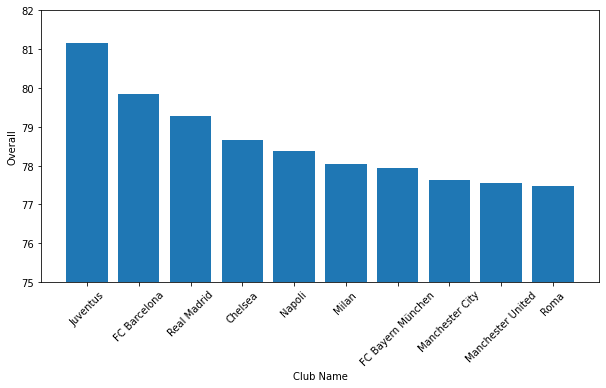

In [13]:
# What are the best teams
mean_overall_for_each_club = fifa_19.groupby('club_name').agg('mean')[['overall']]
mean_overall_for_each_club.sort_values(by='overall',ascending=False, inplace=True)
plt.figure(figsize=(10,5))

plt.bar(mean_overall_for_each_club.index[0:10], mean_overall_for_each_club["overall"][0:10])
plt.xticks(rotation=45)
plt.ylim(75,82)
plt.xlabel('Club Name')
plt.ylabel('Overall')

### Best Teams Complicated

In [14]:
def top_n_mean(df,n,sort_by_col):
    '''
    Mean of top n players instead of mean of all players 
    Sort by sort_by_col
    '''
    return df.sort_values(by=sort_by_col,ascending=False)[0:n].mean()

In [15]:
def top_teams(df,group_col,sort_col,num):
    '''
    Inputs:
    df: dataframe
    group_col: column to group by
    sort_col: column to sort by
    num: number of players to aggregate over

    Outputs:
    Series of group_col(teams/leagues/nationalaties) and the mean sort_col(overall/value/wage)
    '''
    overall_for_each_club = df[[group_col,sort_col]].groupby(group_col).agg(top_n_mean, n=num,sort_by_col=sort_col)
    
    overall_for_each_club.sort_values(by=sort_col,ascending=False, inplace=True)
    return overall_for_each_club

In [16]:
# Best overall team
best_overall_teams = top_teams(df=fifa_19,group_col='club_name',sort_col='overall',num=11)
best_overall_teams.head(5)

,overall
club_name,
Real Madrid,88.45
FC Barcelona,87.91
Juventus,86.91
FC Bayern München,86.82
Manchester City,86.55


In [17]:
def draw_barchart(df,col_name,y_low,y_high,num=10,y_label_name='',title_name=''):
    '''
    num: how many bars
    col_name: will be same as the sort_col
    y_low: histogram y-axis starts at
    y_high: histogram y-axis ends at
    '''
    plt.figure(figsize=(10,5))
    plt.bar(df.index[0:num], df[col_name][0:num])
    plt.ylabel(y_label_name)
    plt.title(title_name)
    plt.xticks(rotation=45)
    plt.ylim(y_low,y_high)

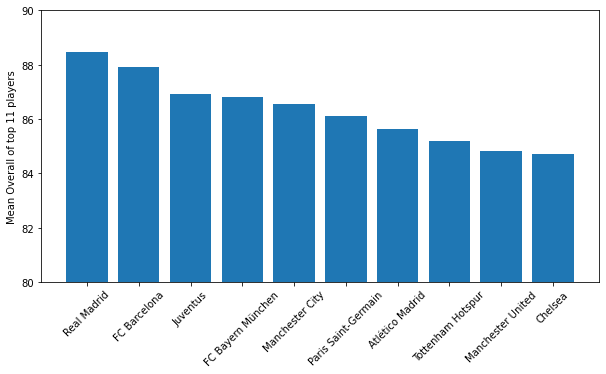

In [18]:
draw_barchart(df=best_overall_teams,col_name='overall',y_low=80,y_high=90,
              num=10,y_label_name='Mean Overall of top 11 players',title_name='')


In [19]:
# Best attacking/midfielder/defending teams
attackers = ['ST','CF','RW','Lw','LF','RF']
midfielders = ['CAM','CDM','CM','LAM','LM','LCM','LCM','RAM','RM','RCM','RDM']
defenders = ['LWB','CDM','CAM','RWB','LB','CB','RB','GK']

fifa_19_attackers = fifa_19.loc[fifa_19['team_position'].isin(attackers)]
fifa_19_midfielders = fifa_19.loc[fifa_19['team_position'].isin(midfielders)]
fifa_19_defenders = fifa_19.loc[fifa_19['team_position'].isin(defenders)]

best_attacking_teams = top_teams(df=fifa_19_attackers,group_col='club_name',sort_col='overall',num=11)
best_midfield_teams = top_teams(df=fifa_19_midfielders,group_col='club_name',sort_col='overall',num=11)
best_defending_teams = top_teams(df=fifa_19_defenders,group_col='club_name',sort_col='overall',num=11)

best_attacking_teams.head(5)
#best_midfield_teams.head(5)
#best_defending_teams.head(5)




,overall
club_name,
Juventus,94.00
FC Barcelona,92.50
FC Bayern München,90.00
Tottenham Hotspur,89.00
Paris Saint-Germain,88.00


### Best Leagues and Nationalities

In [20]:
best_overall_leagues = top_teams(df=fifa_19,group_col='league_name',sort_col='overall',num=100)
best_overall_nationalities = top_teams(df=fifa_19,group_col='nationality',sort_col='overall',num=100)
best_overall_leagues.head(5)

,overall
league_name,
English Premier League,83.80
Spain Primera Division,83.59
Italian Serie A,82.70
German 1. Bundesliga,81.32
French Ligue 1,79.79


### Expensive/High wage Teams/Leagues/Nationalities

In [21]:
# Aggregate used is sum instead of mean

# Expensive
most_expensive_teams = top_teams(df=fifa_19,group_col='club_name',sort_col='value_eur',num=11)
most_expensive_leagues = top_teams(df=fifa_19,group_col='league_name',sort_col='value_eur',num=100)
most_expensive_nationalities = top_teams(df=fifa_19,group_col='nationality',sort_col='value_eur',num=100)

# Highest Wage
highest_wage_teams = top_teams(df=fifa_19,group_col='club_name',sort_col='wage_eur',num=11)
highest_wage_leagues = top_teams(df=fifa_19,group_col='league_name',sort_col='wage_eur',num=100)
highest_wage_nationalities = top_teams(df=fifa_19,group_col='nationality',sort_col='wage_eur',num=100)

highest_wage_nationalities.head(5)

,wage_eur
nationality,
Spain,92500.00
Brazil,73200.00
France,70700.00
England,69900.00
Germany,62500.00


### Drop Useless Attributes

In [22]:
useless = ['short_name','club_name','nationality','league_name','body_type']
fifa_19.drop(useless,axis=1,inplace=True)

# Machine Learning

### Features

In [23]:
# International Reputation
international_rep_df = pd.get_dummies(fifa_19.international_reputation)
international_rep_df = international_rep_df.rename(columns={1: 'international_reputation_1',
                                                           2: 'international_reputation_2',
                                                           3: 'international_reputation_3',
                                                           4: 'international_reputation_4',
                                                           5: 'international_reputation_5',})
fifa_19.drop(['international_reputation'],axis=1,inplace=True)
fifa_19 = pd.concat([fifa_19, international_rep_df], axis=1)

# Weak Foot
weakfoot_df = pd.get_dummies(fifa_19.weak_foot)
weakfoot_df  = weakfoot_df.rename(columns={                1: 'weakfoot_1',
                                                           2: 'weakfoot_2',
                                                           3: 'weakfoot_3',
                                                           4: 'weakfoot_4',
                                                           5: 'weakfoot_5',})
fifa_19.drop(['weak_foot'],axis=1,inplace=True)
fifa_19 = pd.concat([fifa_19, weakfoot_df], axis=1)

# Skill Moves
skill_moves_df = pd.get_dummies(fifa_19.skill_moves)
skill_moves_df  = skill_moves_df.rename(columns={               1: 'skill_moves_1',
                                                                2: 'skill_moves_2',   
                                                                3: 'skill_moves_3',
                                                                4: 'skill_moves_4',
                                                                5: 'skill_moves_5',})
fifa_19.drop(['skill_moves'],axis=1,inplace=True)
fifa_19 = pd.concat([fifa_19, skill_moves_df], axis=1)

one_hot_encoded_features = []
for i in range(1,6):
    one_hot_encoded_features.append('international_reputation_'+str(i))
    one_hot_encoded_features.append('weakfoot_'+str(i))
    one_hot_encoded_features.append('skill_moves_' + str(i))

player_attributes = fifa_19.columns[13:47]
player_attributes = list(player_attributes)

# Boolean: Preferred Foot is right 
fifa_19['preferred_foot'] = fifa_19['preferred_foot'].map({'Right':1,'Left':0}).astype(bool)
fifa_19['preferred_foot']

physical_features = ['height_cm','weight_kg','age']
prefered_foot = ['preferred_foot']

### Linear Regression with Regularization

In [24]:
attackers = ['ST','CF','RW','LW','LF','RF','LS','RS']
midfielders = ['CAM','CDM','CM','LAM','LM','LCM', 'LDM','RAM','RM','RCM','RDM']
defenders = ['RB','LB',"RCB","LCB",'RWB','LWB',"CB"]
goalkeepers = ['GK']
all_positions = attackers + midfielders + defenders + goalkeepers


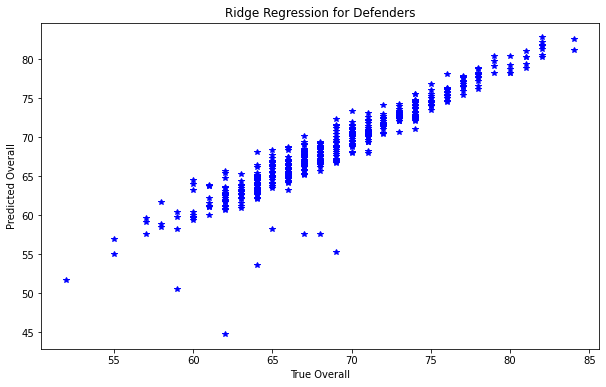

train_score train_mse test_score test_mse alpha
Lasso all_positions        0.84      6.04       0.84     6.04  0.00
      attackers            0.96      1.39       0.96     1.39  0.03
      midfielders          0.90      3.57       0.90     3.57  0.01
      defenders            0.89      3.18       0.89     3.18  0.01
      goalkeepers          1.00      0.11       1.00     0.11  0.01
Ridge all_positions        0.84      6.04       0.84     6.04 17.89
      attackers            0.97      1.38       0.97     1.38 25.95
      midfielders          0.90      3.57       0.90     3.57 25.95
      defenders            0.89      3.16       0.89     3.16 65.79
      goalkeepers          1.00      0.12       1.00     0.12  1.32

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
    
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV 

from sklearn.metrics import mean_squared_error

def regularized_regression_model(df, player_attributes, position, regularization_method,plot_title=''):
    # Lasso Regression
    df = df.loc[ df['team_position'].isin(position) ] 
    X = df[player_attributes]
    y = df['overall']

    # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


    # Cross Validation
    # There are 10 alphas ranging from 10**-5 to 10**1 and exponentially increasing 
    alpha_list = np.logspace(-4, 4, 100)

    regularized_regression = regularization_method(alphas=alpha_list,cv=5).fit(X_train, y_train)
    best_alpha = regularized_regression.alpha_
    train_score = regularized_regression.score(X_test, y_test)
    train_mse = mean_squared_error(y_test, regularized_regression.predict(X_test))


    # Test Set predictions
    test_score = regularized_regression.score(X_test, y_test)
    y_pred = regularized_regression.predict(X_test)
    test_mse = mean_squared_error(y_test,y_pred)

    if plot_title != "":
        # Plot the results
        plt.figure(figsize=(10,6))
        plt.plot(y_test, y_pred, 'b*')
        plt.title(plot_title)
        plt.xlabel('True Overall')
        plt.ylabel('Predicted Overall')
        plt.show()

    return train_score, train_mse, test_score, test_mse, best_alpha

#position_list_strings = ['all_positions','attackers','midfielders','defenders','goalkeepers']
regression_df = pd.DataFrame(columns=['train_score', 'train_mse', 'test_score', 'test_mse', 'alpha'],
                             index=pd.MultiIndex.from_product([['Lasso', 'Ridge'],['all_positions','attackers','midfielders','defenders','goalkeepers']]))


regression_df.loc['Lasso','all_positions'] = regularized_regression_model(fifa_19, player_attributes, all_positions, LassoCV)
regression_df.loc['Ridge','all_positions'] = regularized_regression_model(fifa_19, player_attributes, all_positions, RidgeCV)
regression_df.loc['Lasso','attackers'] = regularized_regression_model(fifa_19, player_attributes, attackers, LassoCV)
regression_df.loc['Ridge','attackers'] = regularized_regression_model(fifa_19, player_attributes, attackers, RidgeCV)
regression_df.loc['Lasso','midfielders'] = regularized_regression_model(fifa_19, player_attributes, midfielders, LassoCV)
regression_df.loc['Ridge','midfielders'] = regularized_regression_model(fifa_19, player_attributes, midfielders, RidgeCV)
regression_df.loc['Lasso','defenders'] = regularized_regression_model(fifa_19, player_attributes, defenders, LassoCV)
regression_df.loc['Ridge','defenders'] = regularized_regression_model(fifa_19, player_attributes, defenders, RidgeCV, plot_title='Ridge Regression for Defenders')
regression_df.loc['Lasso','goalkeepers'] = regularized_regression_model(fifa_19, player_attributes, goalkeepers, LassoCV)
regression_df.loc['Ridge','goalkeepers'] = regularized_regression_model(fifa_19, player_attributes, goalkeepers, RidgeCV)

regression_df

### Neural Network

In [26]:
# Neural Network
from sklearn.neural_network import MLPClassifier
features = ['overall','potential'] + physical_features
X = fifa_19[features]
y = fifa_19['value_eur']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
mlp = MLPClassifier(hidden_layer_sizes=(70,50,30,20), max_iter=10**6, learning_rate='adaptive', learning_rate_init=0.001)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

# Mean Squared Error
print(mean_squared_error(y_test, mlp_pred))
# R2 Score
from sklearn.metrics import r2_score
print(r2_score(y_test, mlp_pred))

value_df = pd.DataFrame({"y_true":y_test, "y_pred":mlp_pred})

845581340800.8961
0.9752858272341255


### Scaling Stats

In [27]:
# Divide all the atrrributes by the overall
def divide_by_overall(row,attribute,overall):
    return row[attribute]/row[overall]

for i in player_attributes:
    fifa_19[i] = fifa_19.apply(divide_by_overall,axis=1,args=(i,'overall'))

### KNN

In [28]:
attacking_attributes = player_attributes[:5]
skill_attributes = player_attributes[5:10]
movement_attributes = player_attributes[10:15]
power_attributes = player_attributes[15:20]
mentality_attributes = player_attributes[20:26]
defending_attributes = player_attributes[26:29]
goalkeeper_attributes = player_attributes[29:]

player_attributes_list = [attacking_attributes,skill_attributes,movement_attributes,power_attributes,mentality_attributes,defending_attributes,goalkeeper_attributes]


In [29]:
fifa_19_copy = fifa_19.copy()

In [30]:
fifa_19 = fifa_19_copy

In [31]:
# K-Means Clustering
from sklearn.cluster import KMeans

clusters_df_list = []
for i in player_attributes_list:
    cluster_name = i[0].split('_')[0]

    # Attribute to cluster on
    X = fifa_19[i]

    # Scale the data
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    # Find optimal number of clusters
    inertia_list = []
    for k in range(2,10):
        kmeans = KMeans(n_clusters=k).fit(X)
        inertia_list.append(kmeans.inertia_)

    # Plot the results
    ploty = False
    if ploty:
        plt.figure(figsize=(5,3))
        plt.plot(range(2,10),inertia_list)
        plt.title( 'K-Means Clustering '+cluster_name )
        plt.xlabel('Number of Clusters')
        plt.ylabel('Inertia')
        plt.show()

    # Find the optimal number of clusters
    inertia_list = np.array(inertia_list)
    k = np.argmin(inertia_list) + 2

    # Cluster the data
    kmeans = KMeans(n_clusters=k).fit(X)

    # Get the cluster labels
    labels = kmeans.labels_

    # Create a dataframe of the labels
    clusters_df = pd.DataFrame(columns=[cluster_name],index=fifa_19.index)
    clusters_df[cluster_name] = labels

    # Add the cluster labels to the fifa dataframe
    fifa_19 = fifa_19.join(clusters_df)


kmean_cluters_list = ['attacking','skill','movement','power','mentality','defending','goalkeeping']

### Random Forrest

In [32]:
def above_threshold(x,threshold):
    binary_array = [ i[1] > threshold for i in x ]
    return binary_array

# Multi-Output Classification of player_positions using Random Forest
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier

features_no_clusters = player_attributes + one_hot_encoded_features + physical_features + prefered_foot
features_clusters = kmean_cluters_list + one_hot_encoded_features + physical_features

for features in [ features_no_clusters, features_clusters ]:
    X = fifa_19[features]
    y = fifa_19['player_positions']

    # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Multi-Label Binarizer
    mlb = MultiLabelBinarizer()
    y_train = mlb.fit_transform(y_train)
    y_test = mlb.transform(y_test)

    # Train the model
    forrest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
    forrest.fit(X_train, y_train)

    # Predictions
    # Method 1: Random Forest's Default Prediction
    y_pred_default = forrest.predict(X_test)

    # Method 2: Using Threshold
    y_pred_threshold = forrest.predict_proba(X_test)
    y_pred_2 = np.array([ above_threshold(x,0.1) for x in y_pred_threshold ]).T
    y_pred_3 = np.array([ above_threshold(x,0.3) for x in y_pred_threshold ]).T

    # Transform Back to Strings
    y_test_strings = mlb.inverse_transform(y_test)
    y_pred_1_strings = mlb.inverse_transform(y_pred_default)
    y_pred_2_strings = mlb.inverse_transform(y_pred_2)
    y_pred_3_strings = mlb.inverse_transform(y_pred_3)

    # Convert to Sets
    y_test_strings = [ set(i) for i in y_test_strings ]
    y_pred_1_strings = [ set(i) for i in y_pred_1_strings ]
    y_pred_2_strings = [ set(i) for i in y_pred_2_strings ]
    y_pred_3_strings = [ set(i) for i in y_pred_3_strings ]


    # Evaluation
    def evaluator(y_pred_strings,y_test_strings,method_name):
        y_found_exact_match = [ i==j for i,j in zip(y_pred_strings,y_test_strings) ]
        y_no_incorrect_prediction = [ i.issubset(j) for i,j in zip(y_pred_strings,y_test_strings) ]
        y_found_all = [ j.issubset(i) for i,j in zip(y_pred_strings,y_test_strings) ]
        y_found_any = [ len(i.intersection(j)) > 0 for i,j in zip(y_pred_strings,y_test_strings) ]    

        predictions_df = pd.DataFrame({"y_true":y_test_strings, "y_pred":y_pred_strings, 'exact_match':y_found_exact_match, 'no_incorrect_prediction':y_no_incorrect_prediction, 'found_all':y_found_all, 'found_any':y_found_any})

        print(f"{method_name} ")
        print( predictions_df.mean() )
        print("______________________________________________________________________________________________________________")

    evaluator(y_pred_1_strings,y_test_strings,"Default Prediction")
    evaluator(y_pred_3_strings,y_test_strings,"High Threshold")
    evaluator(y_pred_2_strings,y_test_strings,"Low Threshold")
    print("\n\n")


Default Prediction 
exact_match               0.50
no_incorrect_prediction   0.87
found_all                 0.54
found_any                 0.84
dtype: float64
______________________________________________________________________________________________________________
High Threshold 
exact_match               0.47
no_incorrect_prediction   0.60
found_all                 0.69
found_any                 0.96
dtype: float64
______________________________________________________________________________________________________________
Low Threshold 
exact_match               0.24
no_incorrect_prediction   0.25
found_all                 0.92
found_any                 1.00
dtype: float64
______________________________________________________________________________________________________________



Default Prediction 
exact_match               0.41
no_incorrect_prediction   0.83
found_all                 0.43
found_any                 0.68
dtype: float64
_____________________________________